## Central limit theorem by hands 

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

Choose an interestiong continuous distribution - Arcsine distribution. The distribution funtion is defined by the equation:

$$F(x) = \frac{2}{\pi}\cdot arcsin(\sqrt{x}) = \frac{arcsin(2x-1)}{\pi} + \frac{1}{2} $$

   The probability density function is:

   $$ f(x) = \frac{1}{\pi \sqrt{x(1-x)}} $$

   $$0\leq x \leq 1$$

In [2]:
# Freeze arcsine distribution
rv = sts.arcsine()

# Generate random sample (size = 1000) 
sample = sts.arcsine.rvs(size=1000)

In [3]:
# Theoretical statistics
print('Theoretical mean: ', rv.mean())
print('Theoretical standard deviation: ', rv.std())

Theoretical mean:  0.5
Theoretical standard deviation:  0.3535533905932738


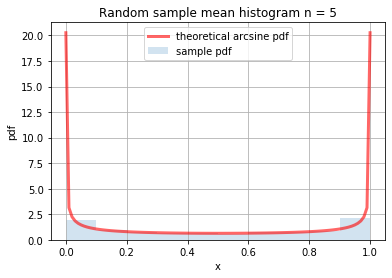

In [4]:
# Build random sample histogram and theoretical arcsine distribution 
fig, ax = plt.subplots(1, 1)

x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

ax.plot(x, rv.pdf(x), 'r-', lw=3, alpha=0.6, label='theoretical arcsine pdf')
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='sample pdf')
plt.title('Random sample mean histogram n = 5')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend()
plt.grid()

In [5]:
# Generate three diferent random samples (n = 5, 10, 50, size = 1000) 
sample_num = 1000
n_list = [5, 10, 50]
mean_array = []

for i in range(len(n_list)):
    for _ in range(sample_num):
        samples_array = sts.arcsine.rvs(size=n_list[i])
        mean_array.append(np.mean(samples_array))

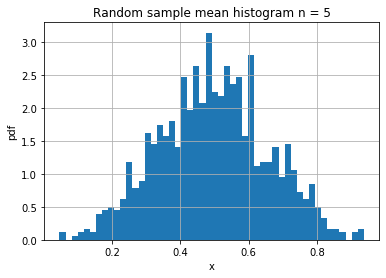

In [6]:
# Build randon sample mean histogram n = 5
fig, ax = plt.subplots(1, 1)
ax.hist(mean_array[:1000], bins=50, density=True)
plt.title('Random sample mean histogram n = 5')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()

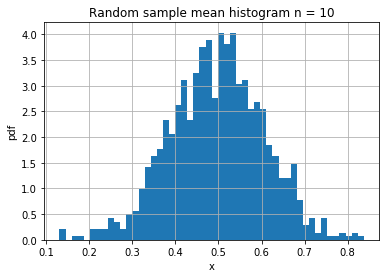

In [7]:
# Build randon sample mean histogram n = 10
fig, ax = plt.subplots(1, 1)
ax.hist(mean_array[1000:2000], bins=50, density=True)
plt.title('Random sample mean histogram n = 10')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()

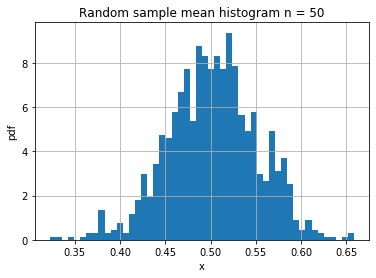

In [8]:
# Build randon sample mean histogram n = 50
fig, ax = plt.subplots(1, 1)
ax.hist(mean_array[2000:], bins=50, density=True)
plt.title('Random sample mean histogram n = 50')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()

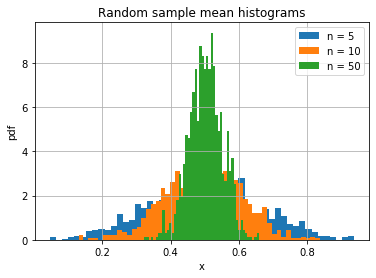

In [9]:
# Build all randon samples in the same axis
fig, ax = plt.subplots(1, 1)
ax.hist(mean_array[:1000], bins=50, density=True, label='n = 5')
ax.hist(mean_array[1000:2000], bins=50, density=True, label='n = 10')
ax.hist(mean_array[2000:], bins=50, density=True, label='n = 50')
plt.title('Random sample mean histograms')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.legend()

[For the arcsine distributuon](https://en.wikipedia.org/wiki/Arcsine_distribution):  
$$ mean = \frac{1}{2}$$ 
$$variance = \frac{1}{8}$$


In [10]:
# Calculate theoretical mean and variance valuables
mean, var, skew, kurt = rv.stats(moments='mvsk')
print('Theoretical mean = ', mean)
print('Theoretical variable = ', var)

Theoretical mean =  0.5
Theoretical variable =  0.125


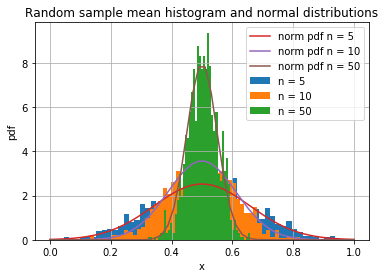

In [11]:
# Build randon sample mean histogram n = 5 and normal distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1)
ax.hist(mean_array[:1000], bins=50, density=True, label='n = 5')
ax.hist(mean_array[1000:2000], bins=50, density=True, label='n = 10')
ax.hist(mean_array[2000:], bins=50, density=True, label='n = 50')
for i in n_list:
    norm_rv = sts.norm(loc=mean, scale=sqrt(var/i))
    ax.plot(x, norm_rv.pdf(x), label= 'norm pdf n = {}'.format(i))
plt.title('Random sample mean histogram and normal distributions')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend()
plt.grid()

### Conclusion

We can see a clear difference between different size of disrtibutions.  No doubt that if size of disrtibution (n) increases the aproximation accuracy increaes as well.